Thinkful Data cleaning and validation project.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

welcome = pd.read_csv('WELCOME.csv', encoding="ISO-8859-15")

In [2]:
welcome.head(20)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [3]:
welcome_cleaned = welcome
# welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'] = welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
welcome_cleaned['Journal title'] = welcome_cleaned['Journal title'].str.replace('Org', 'Med')
welcome_cleaned['Journal title'] = welcome_cleaned['Journal title'].str.replace('J MED CHEM', 'JOURNAL OF MEDICINAL CHEMISTRY')
welcome_cleaned['Journal title'] = welcome_cleaned['Journal title'].str.upper()
welcome_cleaned['Publisher'] = welcome_cleaned['Publisher'].str.strip()
welcome_cleaned['Publisher'] = welcome_cleaned['Publisher'].str.upper()
replacements = { 
"ACS PUBLICATIONS": "AMERICAN CHEMICAL SOCIETY",
"ACS (AMERCIAN CHEMICAL SOCIETY) PUBLICATIONS": "AMERICAN CHEMICAL SOCIETY",
"ACS": "AMERICAN CHEMICAL SOCIETY",
"ACSACSACSACSACS": "AMERICAN CHEMICAL SOCIETY",
"THE AMERICAN CHEMICAL SOCIETY PETROLEUM RESEARCH TRUST": "AMERICAN CHEMICAL SOCIETY",
"AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLGY": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"AMERICAN SOC FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"THE AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"THE AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY, INC": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"ASBMB CADMUS": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"ASBMB/CADMUS": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"ASBMB/CENVEO PUBLISHER SERVICES": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"ASBMC /CENVEO": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"ASBMB": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"AMBSB": "AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY",
"AMERICAN PSYCHOLOGICAL ASSOCIATION": "AMERICAN PSYCHIATRIC PUBLISHING",
"THE AMERICAN PHYSIOLOGICAL SOCIETY": "AMERICAN PSYCHIATRIC PUBLISHING",
"AMERICAN PSYCHIATRIC ASSOCIATION": "AMERICAN PSYCHIATRIC PUBLISHING",
"AMERICAN SOCIETY OF HAMATOLOGY": "AMERICAN SOCIETY OF HEMATOLOGY",
"AMERICAN SOCIETY OF HAEMATOLOGY": "AMERICAN SOCIETY OF HEMATOLOGY",
"ASM": "AMERICAN SOCIETY OF MICROBIOLOGY",
"ASM (AMERICAN SOCIETY FOR MICROBIOLOGY)": "AMERICAN SOCIETY OF MICROBIOLOGY",
"AMERICAN SOCIETY FOR MICROBIOLOGY": "AMERICAN SOCIETY OF MICROBIOLOGY",
"BIOMED CENTRAL": "BIOMED CENTRAL LIMITED",
"BIOMED CENTRAL LTD": "BIOMED CENTRAL LIMITED",
"BENTHAM SCIENCE PUBLISHERS": "BENTHAN SCIENCE PUBLISHERS",
"BMJ": "BRITISH MEDICAL JOURNAL",
"BMJ GROUP": "BRITISH MEDICAL JOURNAL",
"BMJ JOURNALS": "BRITISH MEDICAL JOURNAL",
"BMJ PUBLISHING GROUP": "BRITISH MEDICAL JOURNAL",
"BMJ PUBLISHING GROUP LTD": "BRITISH MEDICAL JOURNAL",
"BMJ PUBLISHING GROUP LTD & BRITISH THORACIC SOCIETY": "BRITISH MEDICAL JOURNAL",
"CADMUS": "CADMUS JOURNAL SERVICES",
"CADMUS JOURNAL SERVICE": "CADMUS JOURNAL SERVICES",
"CAMDUS JOURNAL SERVICES": "CADMUS JOURNAL SERVICES",
"CAMBRIDGE JOURNALS": "CAMBRIDGE UNIVERSITY PRESS",
"CAMBRIDGE UNI PRESS": "CAMBRIDGE UNIVERSITY PRESS",
"CAMBRIDGE UNIV PRESS": "CAMBRIDGE UNIVERSITY PRESS",
"CENVEO PUBLISHER SERVICES/ASM JV1": "CENVEO PUBLISHER SERVICES",
"COLD SPRING HABOUR PRESS": "COLD SPRING HARBOR PUBLICATIONS",
"COLD SPRING HARBOR": "COLD SPRING HARBOR PUBLICATIONS",
"COLD SPRING HARBOR LABORATORY PRESS": "COLD SPRING HARBOR PUBLICATIONS",
"COLD SPRING HARBOR PRESS": "COLD SPRING HARBOR PUBLICATIONS",
"CSHLP": "COLD SPRING HARBOR PUBLICATIONS",
"COMPANY OF BIOLOGIST": "COMPANY OF BIOLOGISTS LTD",
"COMPANY OF BIOLOGISTS": "COMPANY OF BIOLOGISTS LTD",
"DARMOUTH JOURNAL SERVICES": "DARTMOUTH JOURNAL SERVICES",
"DARTMOUTH JOURNALS": "DARTMOUTH JOURNAL SERVICES",
"ELSEVIER": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVEIER SCIENCE": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVIER / CELL SCIENCE": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVIER B.V.": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVIER/CELL PRESS": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVIER LTD": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"ELSEVIER (CELL PRESS)": "AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)",
"EUROPEAN SOCIETY OF ENDOCRINOLOG": "THE ENDOCRINE SOCIETY",
"ENDOCRINE SOCIETY": "THE ENDOCRINE SOCIETY",
"FEDERATION OF THE AMERICAN SOCIETY OF EXPERIMENTAL BIOLOGY": "FEDERATION OF THE AMERICAN SOCIETY OF EXPERIMENTAL BIOLOGY",
"FEDERATION OF AMERICAN SOCIETIES FOR EXPERIMENTAL BIOLOGY (FASEB)": "FEDERATION OF THE AMERICAN SOCIETY OF EXPERIMENTAL BIOLOGY",
"FASEB": "FEDERATION OF THE AMERICAN SOCIETY OF EXPERIMENTAL BIOLOGY",
"FRONTIERS": "FRONTIERS RESEARCH FOUNDATION",
"FRONTIERS MEDIA": "FRONTIERS RESEARCH FOUNDATION",
"FRONTIERS MEDIA SA": "FRONTIERS RESEARCH FOUNDATION",
"FUTURE MEDICINE LTD": "FUTURE MEDICINE",
"FUTURE SCIENCE": "FUTURE MEDICINE",
"HINDAWI": "HINDAWI PUBLISHING CORPORATION",
"IMPACT JOURNALS": "IMPACT JOURNALS LLC",
"INFORMA HEALTHCARE": "INFORMA HEALTHCARE COMMUNICATIONS",
"INTERNATIONAL UNION OF CRYSTALLOGRAPHY (IUCR)": "INTERNATIONAL UNION OF CRYSTALLOGRAPHY",
"JOHN WILEY": "JOHN WILEY & SONS",
"JOHN WILEY & SONS INC": "JOHN WILEY & SONS, INC.",
"JOHN WILEY & SONS LTD": "JOHN WILEY & SONS, INC.",
"JOHN WILEY AND SONS": "JOHN WILEY & SONS, INC.",
"JOHN WILEY & SONS": "JOHN WILEY & SONS, INC.",
"JOHN WILEY AND SONS LTD": "JOHN WILEY & SONS, INC.",
"LANDES BIOSCIENCE": "LANDES BIOSCIENCES",
"MARY ANN LIEBERT": "MARY ANN LIEBERT, INC. PUBLISHERS",
"MARY ANN LIEBERT INC": "MARY ANN LIEBERT, INC. PUBLISHERS",
"MIT PRESS OPEN ACCESS": "MIT PRESS",
"MYJOVE CORPORATION": "MY JOVE CORPORATION",
"MY JOVE CORP": "MY JOVE CORPORATION",
"JOVE": "MY JOVE CORPORATION",
"NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA": "NATIONAL ACADEMY OF SCIENCES, USA",
"NATIONAL ACADEMY OF SCIENCES": "NATIONAL ACADEMY OF SCIENCES, USA",
"NATIONAL ACADEMY OF SCIENCES USA": "NATIONAL ACADEMY OF SCIENCES, USA",
"NATURE": "NATURE PUBLISHING GROUP LTD",
"NATURE PG": "NATURE PUBLISHING GROUP LTD",
"NATURE PUBLISHING": "NATURE PUBLISHING GROUP LTD",
"NATURE PUBLISHING GROUP": "NATURE PUBLISHING GROUP LTD",
"NPG": "NATURE PUBLISHING GROUP LTD",
"OUP": "OXFORD UNIVERSITY PRESS (OUP)",
"OXFORD JOURNALS": "OXFORD UNIVERSITY PRESS (OUP)",
"OXFORD JOURNALS (OUP)": "OXFORD UNIVERSITY PRESS (OUP)",
"OXFORD UNIV PRESS": "OXFORD UNIVERSITY PRESS (OUP)",
"OXFORD UNIVERSITY PRESS": "OXFORD UNIVERSITY PRESS (OUP)",
"OXFORD UNIVESITY PRESS": "OXFORD UNIVERSITY PRESS (OUP)",
"PLOS": "PLOS (PUBLIC LIBRARY OF SCIENCE",
"PLOS PUBLIC LIBRARY OF SCIENCE": "PLOS (PUBLIC LIBRARY OF SCIENCE",
"PNAS": "PNAS AUTHOR PUBLICATION",
"PORTLAND PRESS": "PORTLAND PRESS LTD",
"PUBMED": "PUBMED CENTRAL",
"ROYAL SOCIETY FOR CHEMISTRY": "ROYAL SOCIETY OF CHEMISTRY",
"RSC": "ROYAL SOCIETY OF CHEMISTRY",
"RSC PUBLISHING": "ROYAL SOCIETY OF CHEMISTRY",
"SAGE": "SAGE PUBLICATIONS INC",
"SAGE PUBLICATIONS": "SAGE PUBLICATIONS INC",
"SAGE PUBLICATIONS LTD": "SAGE PUBLICATIONS INC",
"SAGE PUBLISHERS": "SAGE PUBLICATIONS INC",
"SAGE PUBLISHING": "SAGE PUBLICATIONS INC",
"SOCIETY OF GENERAL MICROBIOLOGY": "SOCIETY FOR GENERAL MICROBIOLOGY",
"SOCIETY FOR GENERMAL MICROBIOLOGY": "SOCIETY FOR GENERAL MICROBIOLOGY",
"SOCIETY OF NEURO SCIENCES": "SOCIETY FOR NEUROSCIENCES",
"SOCIETY OF NEUROSCIENCE": "SOCIETY FOR NEUROSCIENCES",
"SOCIETY FOR NEUROSCIENCE": "SOCIETY FOR NEUROSCIENCES",
"SOCIETY OF LEUKOCYTE BIOLOGY": "SOCIETY FOR LEUKOCYTE BIOLOGY",
"SPRINGER": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER - VERLAG GMBH": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER VERLAG": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER-VERIAG GMBH": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER-VERLAG GMBH & CI": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER-VERLAG GMBH": "SPRINGER SCIENCE + BUSINESS MEDIA",
"SPRINGER-VERLAG GMBH": "SPRINGER SCIENCE + BUSINESS MEDIA",
"T&F": "TAYLOR & FRANCIS JOURNALS",
"TAYLOR & FRANCIS": "TAYLOR & FRANCIS JOURNALS",
"TAYLOR AND FRANCIS": "TAYLOR & FRANCIS JOURNALS",
"SOCIETY FOR ENDOCRINOLOGY": "THE ENDOCRINE SOCIETY",
"THE ENDROCRINE SOCIETY": "THE ENDOCRINE SOCIETY",
"THE ENDOCRINE SOCETY": "THE ENDOCRINE SOCIETY",
"THE COMPANY OF BIOLGISTS": "THE COMPANY OF BIOLOGISTS",
"THE COMPANY OF BIOLOGISTS LTD": "THE COMPANY OF BIOLOGISTS",
"SHERIDAN PRESS": "THE SHERIDAN PRESS",
"ROYAL COLLEGE OF PSYCHIATRISTS": "THE ROYAL COLLEGE OF PSYCHIATRISTS",
"ROYAL SOCIETY": "THE ROYAL SOCIETY",
"WILEY": "JOHN WILEY & SONS, INC.",
"WILEY & SON": "JOHN WILEY & SONS, INC.",
"WILEY BLACKWELL": "JOHN WILEY & SONS, INC.",
"WILEY ONLINE LIBRARY": "JOHN WILEY & SONS, INC.",
"WILEY SUBSCRIPTION SERVICES": "JOHN WILEY & SONS, INC.",
"WILEY SUBSCRIPTION SERVICES  INC.": "JOHN WILEY & SONS, INC.",
"WILEY SUBSCRIPTION SERVICES INC": "JOHN WILEY & SONS, INC.",
"WILEY SUBSCRIPTION SERVIICES INC": "JOHN WILEY & SONS, INC.",
"WILEY VCH": "JOHN WILEY & SONS, INC.",
"WILEY/BLACKWELL": "JOHN WILEY & SONS, INC.",
"WILEY-BLACKWELL": "JOHN WILEY & SONS, INC.",
"WILEY-BLACKWELL, JOHN WILEY & SONS": "JOHN WILEY & SONS, INC.",
"WILEY-VCH": "v",
"WLIEY-BLACKWELL": "JOHN WILEY & SONS, INC.",
"WOLTERS KLUWER": "WOLTERS KLUWER HEALTH",
"WOLTERS KLUWERS": "WOLTERS KLUWER HEALTH",
"WOLTERS KLUWER N.V./LIPPINOTT": "WOLTERS KLUWER HEALTH",


}

#welcome_cleaned['Publisher'] = welcome_cleaned['Publisher'].str.replace("ACS \(AMERCIAN CHEMICAL SOCIETY\) PUBLICATIONS", "ACS")

welcome_cleaned['Publisher'] = welcome_cleaned["Publisher"].apply(lambda x: replacements.get(x, x))

welcome_by_publisher = welcome_cleaned.groupby('Journal title').sum()
welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'] = welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£','')


In [ ]:
replacements = { 
"replace_this" : "with_this"
}
df['column'] = df['column'].apply(lambda x: replacements.get(x, x))


In [4]:
ls = '10001000'

In [7]:
ls[3:]

'01000'

In [4]:
welcome_cleaned['Publisher'].unique()

array(['CUP', 'AMERICAN CHEMICAL SOCIETY', 'AGA INSTITUTE',
       'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY',
       'AMERICAN ASSOCIATION OF IMMUNOLOGISTS',
       'AMERICAN CHEMICAL SOCIETY PUBLICATIONS',
       'AMERICAN COLLEGE OF CHEST PHYSICIANS',
       'AMERICAN PHYSIOLOGICAL SOCIETY',
       'AMERICAN PSYCHIATRIC PUBLISHING',
       'AMERICAN PUBLIC HEALTH ASSOCIATION',
       'AMERICAN SOCIETY FOR INVESTIGATIVE PATHOLOGY',
       'AMERICAN SOCIETY OF MICROBIOLOGY',
       'AMERICAN SOCIETY FOR NUTRITION', 'AMERICAN SOCIETY OF HEMATOLOGY',
       'AMERICAN SOCIETY OF HUMAN GENETICS (ELSEVIER)',
       'AMERICAN SPEECH-LANGUAGE-HEARING ASSOCIATION',
       'ASSOCIATION FOR RESEARCH IN VISION & OPHTHALMOLOGY',
       'BENTHAN SCIENCE PUBLISHERS', 'BERHAHN BOOKS', 'BIOCHEM JOURNAL',
       'BIOMED CENTRAL LIMITED', 'BIOPHYSICAL SOCIETY', 'BIOSCIENTIFICA',
       'BLACKWELL PUBLISHING LTD/WILEY', 'BMC', 'BRITISH MEDICAL JOURNAL',
       'BRILL', 'BYOPHYSICAL SOCIET

In [5]:
welcome_cleaned.head(20)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,AMERICAN CHEMICAL SOCIETY,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,AMERICAN CHEMICAL SOCIETY,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,AMERICAN CHEMICAL SOCIETY,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,AMERICAN CHEMICAL SOCIETY,J MED CHEM,Regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,AMERICAN CHEMICAL SOCIETY,JOURNAL OF MEDICINAL CHEMISTRY,Comparative Structural and Functional Studies ...,2392.20
6,PMC3709265,AMERICAN CHEMICAL SOCIETY,JOURNAL OF PROTEOME RESEARCH,Mapping Proteolytic Processing in the Secretom...,2367.95
7,23057412 PMC3495574,AMERICAN CHEMICAL SOCIETY,MOL PHARM,Quantitative silencing of EGFP reporter gene b...,649.33
8,PMCID: PMC3780468,AMERICAN CHEMICAL SOCIETY,ACS CHEMICAL BIOLOGY,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,PMCID: PMC3621575,AMERICAN CHEMICAL SOCIETY,ACS CHEMICAL BIOLOGY,Chemical proteomic analysis reveals the drugab...,1294.78


In [6]:
welcome_cleaned['Journal title'].unique()

array(['PSYCHOLOGICAL MEDICINE', 'BIOMACROMOLECULES', 'J MED CHEM',
       'JOURNAL OF MEDICINAL CHEMISTRY', 'JOURNAL OF PROTEOME RESEARCH',
       'MOL PHARM', 'ACS CHEMICAL BIOLOGY',
       'JOURNAL OF CHEMICAL INFORMATION AND MODELING', 'BIOCHEMISTRY',
       'GASTROENTEROLOGY', 'JOURNAL OF BIOLOGICAL CHEMISTRY',
       'JOURNAL OF IMMUNOLOGY', 'ACS CHEMICAL NEUROSCIENCE', 'ACS NANO',
       'AMERICAN CHEMICAL SOCIETY', 'ANALYTICAL CHEMISTRY',
       'BIOCONJUGATE CHEMISTRY', 'JOURNAL OF MEDICINAL CHEMISTRY ',
       'JOURNAL OF THE AMERICAN CHEMICAL SOCIETY', 'CHEST',
       'JOURNAL OF NEUROPHYSIOLOGY', 'JOURNAL OF PHYSIOLOGY',
       'THE JOURNAL OF NEUROPHYSIOLOGY', 'AMERICAN JOURNAL OF PSYCHIATRY',
       'AMERICAL JOURNAL OF PSYCHIATRY', 'BEHAVIORAL NEUROSCIENCE',
       'EMOTION', 'HEALTH PSYCHOLOGY', 'JOURNAL OF ABNORMAL PSYCHOLOGY',
       'JOURNAL OF CONSULTING AND CLINICAL PSYCHOLOGY',
       'JOURNAL OF EXPERIMENTAL PSYCHOLOGY:  ANIMAL BEHAVIOUR PROCESS',
       'JOURNAL

###  The most common journals and the total articles for each

In [7]:
welcome_cleaned['Journal title'].value_counts()

PLOS ONE                                                                                                                        190
JOURNAL OF BIOLOGICAL CHEMISTRY                                                                                                  53
NEUROIMAGE                                                                                                                       29
PLOS GENETICS                                                                                                                    24
PLOS PATHOGENS                                                                                                                   24
NUCLEIC ACIDS RESEARCH                                                                                                           23
PLOS NEGLECTED TROPICAL DISEASES                                                                                                 20
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                             

In [8]:
welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'] = welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'].convert_objects(convert_numeric=True)

/Users/c/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [9]:
welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)'].describe()

count      2114.000000
mean      24206.441892
std      147300.992149
min           0.000000
25%        1280.000000
50%        1889.950000
75%        2322.315000
max      999999.000000
Name: COST (£) charged to Wellcome (inc VAT when charged), dtype: float64

In [10]:
welcome_cleaned['Cost'] = welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)']

wc_outliers_removed = welcome_cleaned[((welcome_cleaned.Cost - welcome_cleaned.Cost.mean()) / welcome_cleaned.Cost.std()).abs() < 3]
print(wc_outliers_removed.mean())
print(wc_outliers_removed.std())
print(wc_outliers_removed.median())


COST (£) charged to Wellcome (inc VAT when charged)    2018.609173
Cost                                                   2018.609173
dtype: float64
COST (£) charged to Wellcome (inc VAT when charged)    6119.374144
Cost                                                   6119.374144
dtype: float64
COST (£) charged to Wellcome (inc VAT when charged)    1863.0
Cost                                                   1863.0
dtype: float64


In [11]:
welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)']

0            0.00
1         2381.04
2          642.56
3          669.64
4          685.88
5         2392.20
6         2367.95
7          649.33
8         1294.59
9         1294.78
10        1329.69
11        1287.20
12        1324.66
13         665.64
14        1006.72
15         238.08
16         265.67
17        2035.00
18        3108.08
19        1267.76
20        2286.73
21         947.07
22        1186.80
23         642.89
24        1533.29
25        2082.74
26        2314.10
27         759.67
28        1565.26
29         572.74
30         750.66
31         321.12
32        1321.88
33        1626.14
34         693.39
35        2383.94
36        1276.08
37        1291.02
38        1319.17
39        1514.35
40        1551.61
41        1314.58
42        1276.60
43        2351.73
44        2350.02
45        3021.72
46        3209.63
47        3211.77
48        2534.53
49        3188.30
50        2534.53
51        3037.86
52        3144.24
53        2659.32
54        3092.18
55        

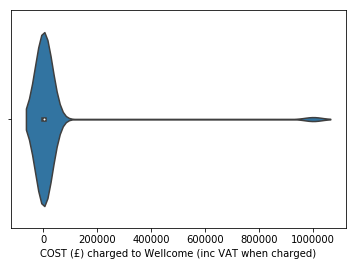

In [12]:
sns.violinplot(welcome_cleaned['COST (£) charged to Wellcome (inc VAT when charged)']);